In [41]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# import data
hnf_data = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

In [43]:
# To view first 5 rows of the data

hnf_data.head()


,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [44]:
# Which Year had the most amount of People in need
need_by_year = hnf_data[hnf_data['Metric'] == 'People in need']
print(need_by_year['Year'])


9       2010
12      2010
15      2010
18      2010
21      2010
        ... 
1218    2024
1219    2024
1220    2024
1221    2024
1222    2024
Name: Year, Length: 402, dtype: int64


In [45]:
# Year with the highest people in need
max_need_row = need_by_year.loc[need_by_year['Value'].idxmax()]
year_with_max_need = max_need_row['Year']
print(f"The year with the most amount of people in need is: {year_with_max_need}")

The year with the most amount of people in need is: 2023


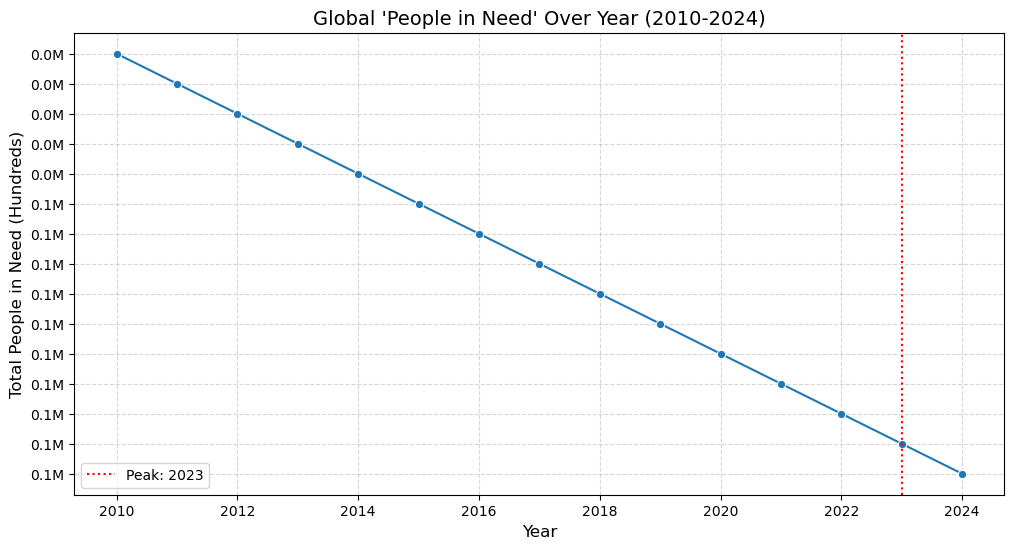

In [47]:
# To group by Year and sum 'Value' 
yearly_need = need_by_year.groupby('Year')['Value'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_need, x='Year', y='Value', marker='o')
plt.title("Global 'People in Need' Over Year (2010-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total People in Need (Hundreds)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e2:.1f}M'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=year_with_max_need, color='red', linestyle=':', label=f'Peak: {year_with_max_need}')
plt.legend()
plt.show()

In [ ]:
# How have global humanitarian needs (People Targeted, People in need) evolved from 2010 to 2024?


# To filter the data for the two metrics of interest
metrics = ['People in need', 'People targeted']
filter_data = hnf_data[hnf_data['Metric'].isin(metrics)]

In [21]:
#To group by Year and Metric, then sum the values globally
global_trends = filter_data.groupby(['Year', 'Metric'])['Value'].sum().reset_index()

In [22]:
# Pivot for easier plotting
trend_pivot = global_trends.pivot(index='Year', columns='Metric', values='Value')


In [ ]:
# Yearly Comparison (People in Need vs. People Targeted)
    targeted = hnf_data[hnf_data['Metric'] == 'People targeted']
    yearly_targeted = targeted.groupby('Year')['Value'].sum().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly_need, x='Year', y='Value', label='People in need')
    sns.lineplot(data=yearly_targeted, x='Year', y='Value', label='People Targeted')
    plt.title("Coverage Gap: People in Need vs. People Targeted", fontsize=14)
    plt.ylabel("Millions of People")
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.show()